In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [168]:
df_teams = pd.read_csv('C:/Users/Alex/Downloads/march-machine-learning-mania-2024/MTeams.csv')
df_season = pd.read_csv('C:/Users/Alex/Downloads/march-machine-learning-mania-2024/MSeasons.csv')
df_tourney_seeds = pd.read_csv('C:/Users/Alex/Downloads/march-machine-learning-mania-2024/MNCAATourneySeeds.csv')
df_season_results = pd.read_csv('C:/Users/Alex/Downloads/march-machine-learning-mania-2024/MRegularSeasonCompactResults.csv')
df_tourney_results = pd.read_csv('C:/Users/Alex/Downloads/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv')

In [169]:
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2024
1,1102,Air Force,1985,2024
2,1103,Akron,1985,2024
3,1104,Alabama,1985,2024
4,1105,Alabama A&M,2000,2024


In [170]:
df_teams.drop(['FirstD1Season', 'LastD1Season'], axis=1, inplace=True)

In [171]:
df_season.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [172]:
df_season.drop(['DayZero'], axis =1, inplace=True)

In [173]:
df_tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [174]:
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [175]:
df_season_results.drop(['NumOT'], axis=1, inplace=True)

In [176]:
df_tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [177]:
df_total = pd.concat([df_teams, df_season_results, df_tourney_results])

In [178]:
df_total.head(10)

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1101.0,Abilene Chr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1102.0,Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1103.0,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1104.0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1105.0,Alabama A&M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1106.0,Alabama St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1107.0,SUNY Albany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1108.0,Alcorn St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1109.0,Alliant Intl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1110.0,American Univ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190002 entries, 0 to 2450
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   TeamID    378 non-null     float64
 1   TeamName  378 non-null     object 
 2   Season    189624 non-null  float64
 3   DayNum    189624 non-null  float64
 4   WTeamID   189624 non-null  float64
 5   WScore    189624 non-null  float64
 6   LTeamID   189624 non-null  float64
 7   LScore    189624 non-null  float64
 8   WLoc      189624 non-null  object 
 9   NumOT     2451 non-null    float64
dtypes: float64(8), object(2)
memory usage: 15.9+ MB


In [180]:
selected_columns = df_total[['Season', 'WTeamID', 'LTeamID', 'WScore', 'LScore', 'WLoc', 'NumOT']]

In [181]:
df_total['WScore'] = df_total['WScore'].fillna(0)
df_total['LScore'] = df_total['LScore'].fillna(0)
df_total['WTeamID'] = df_total['WTeamID'].fillna(0)
df_total['LTeamID'] = df_total['LTeamID'].fillna(0)
df_total['WLoc'] = df_total['WLoc'].fillna(0)
df_total['DayNum'] = df_total['DayNum'].fillna(0)
df_total['Season'] = df_total['Season'].fillna(0)

In [182]:
df_total.head()

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1101.0,Abilene Chr,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,1102.0,Air Force,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
2,1103.0,Akron,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,1104.0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
4,1105.0,Alabama A&M,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN


In [183]:
df_total.describe()

,TeamID,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,378.000000,190002.000000,190002.000000,190002.000000,190002.000000,190002.000000,190002.000000,2451.000000
mean,1289.500000,2001.793397,74.714429,1284.901859,76.650388,1280.685230,64.603720,0.068543
std,109.263443,90.096266,34.830480,119.372730,12.331949,119.437105,11.567837,0.281747
min,1101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1195.250000,1996.000000,46.000000,1198.000000,69.000000,1191.000000,57.000000,0.000000
50%,1289.500000,2007.000000,77.000000,1284.000000,76.000000,1281.000000,64.000000,0.000000
75%,1383.750000,2016.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,1478.000000,2024.000000,154.000000,1478.000000,186.000000,1478.000000,150.000000,3.000000


In [184]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TeamID    378 non-null    int64 
 1   TeamName  378 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [185]:
df_season.info()
df_tourney_seeds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   40 non-null     int64 
 1   RegionW  40 non-null     object
 2   RegionX  40 non-null     object
 3   RegionY  40 non-null     object
 4   RegionZ  40 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2490 non-null   int64 
 1   Seed    2490 non-null   object
 2   TeamID  2490 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.5+ KB


In [186]:
df_season_results.info()
df_tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187173 entries, 0 to 187172
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   187173 non-null  int64 
 1   DayNum   187173 non-null  int64 
 2   WTeamID  187173 non-null  int64 
 3   WScore   187173 non-null  int64 
 4   LTeamID  187173 non-null  int64 
 5   LScore   187173 non-null  int64 
 6   WLoc     187173 non-null  object
dtypes: int64(6), object(1)
memory usage: 10.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2451 non-null   int64 
 1   DayNum   2451 non-null   int64 
 2   WTeamID  2451 non-null   int64 
 3   WScore   2451 non-null   int64 
 4   LTeamID  2451 non-null   int64 
 5   LScore   2451 non-null   int64 
 6   WLoc     2451 non-null   object
 7   NumOT    2451 non-null   int64 
dtypes: int64(7), obj

In [187]:
df_total['WLoc'].value_counts()

WLoc
H    110649
A     57479
N     21496
0       378
Name: count, dtype: int64

# Univariate Analysis

c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WScore', ylabel='Count'>

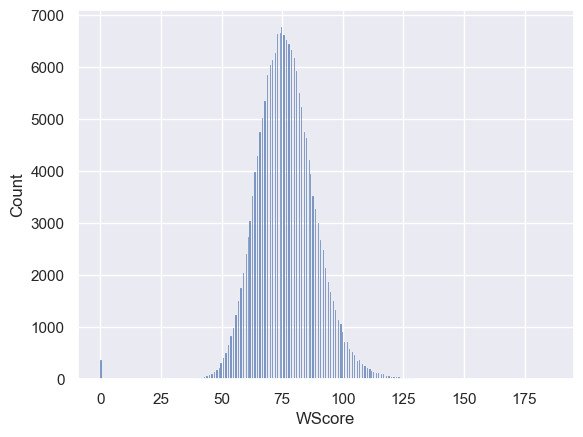

In [188]:
sns.histplot(data=df_total, x = 'WScore')

c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LScore', ylabel='Count'>

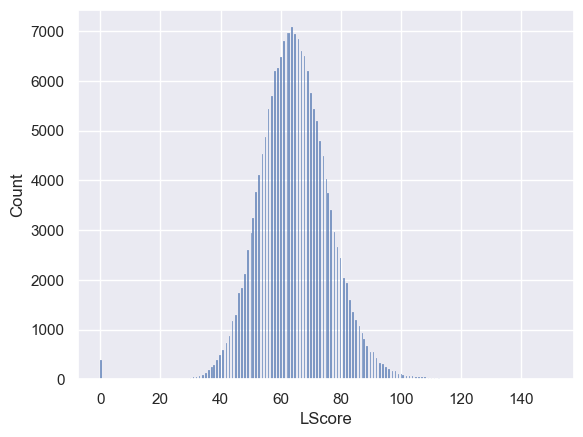

In [189]:
sns.histplot(data=df_total, x = 'LScore')

In [190]:
#sns.histplot(data=df_total, x = 'WLoc')
#ValueError: Unable to parse string "N" at position 378

c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

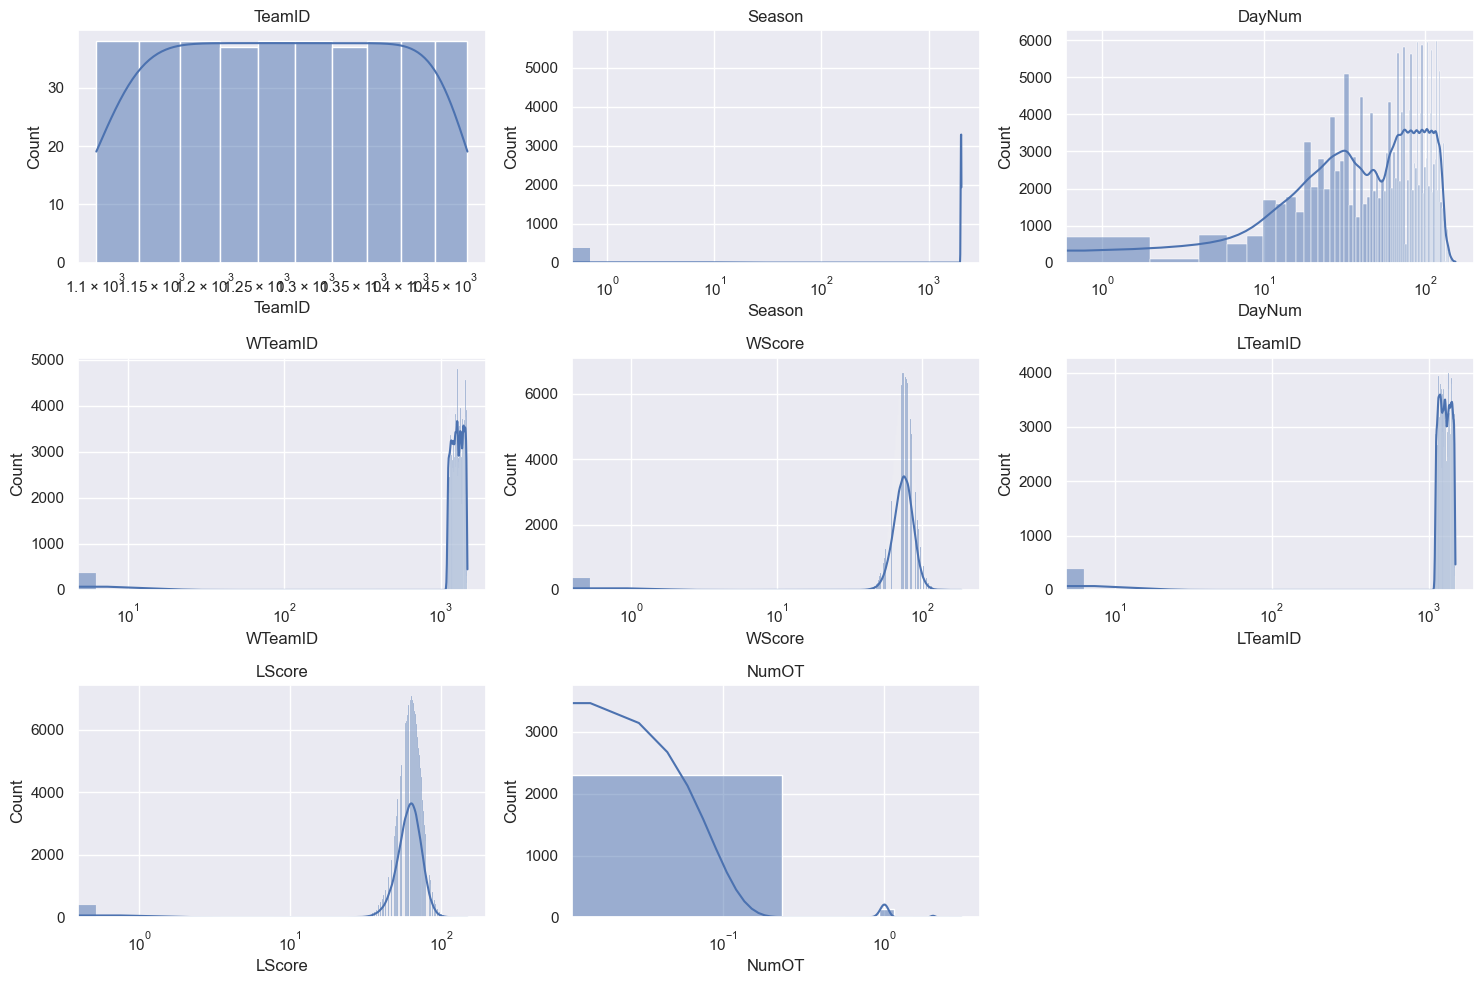

In [191]:
sns.set(style="darkgrid")

# Selecting numerical columns for distribution plots
numerical_cols = df_total.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_total[col], kde=True)
    plt.title(col)
    plt.xscale('log')
    plt.tight_layout()

plt.show()

# Bivariate Analysis

c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


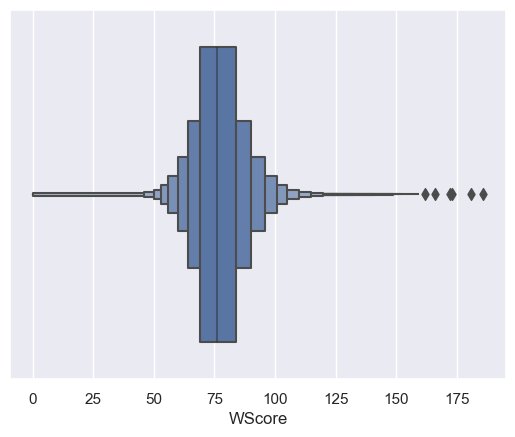

In [192]:
sns.boxenplot(data=df_total, x='WScore')
plt.show()


c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LScore'>

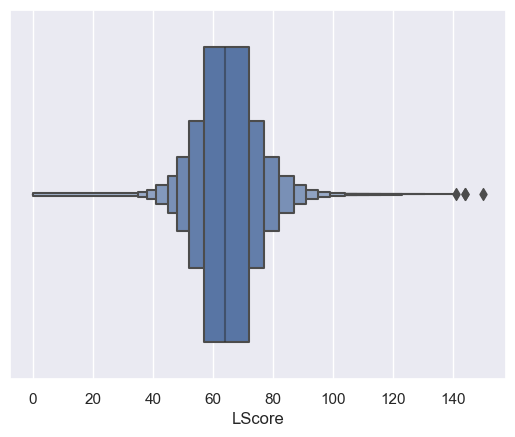

In [193]:
sns.boxenplot(data=df_total, x='LScore')

<Axes: xlabel='WLoc', ylabel='WScore'>

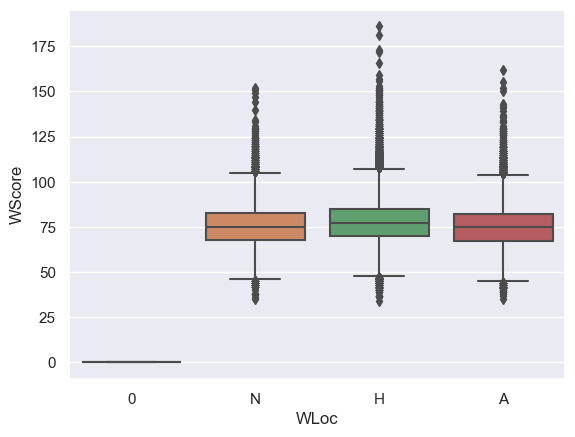

In [194]:
sns.boxplot(data=df_total, y='WScore', x ='WLoc')

c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


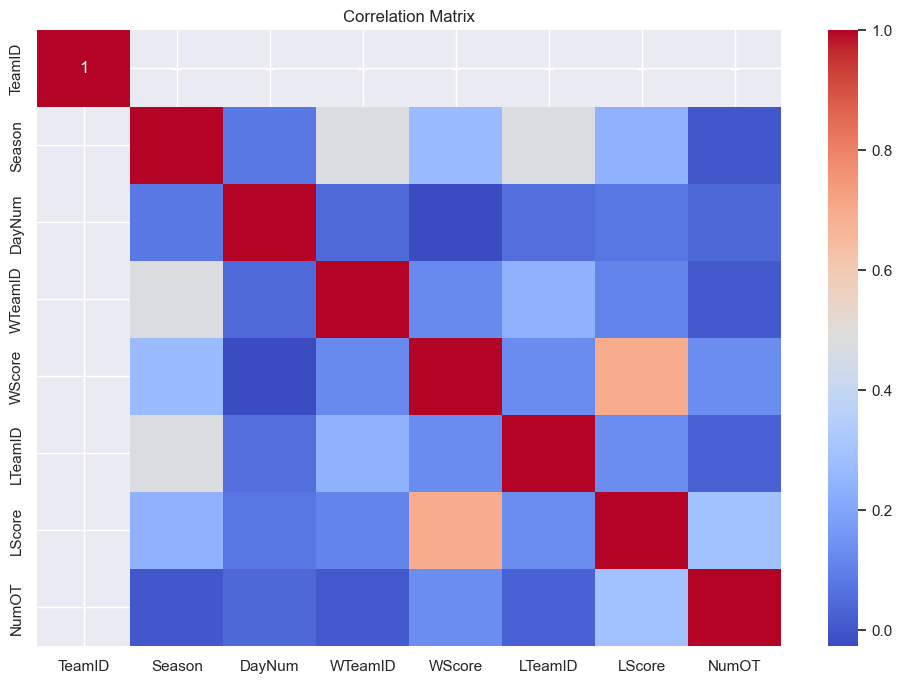

In [195]:
# Correlation Matrix
correlation_matrix = df_total.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='WTeamID'>

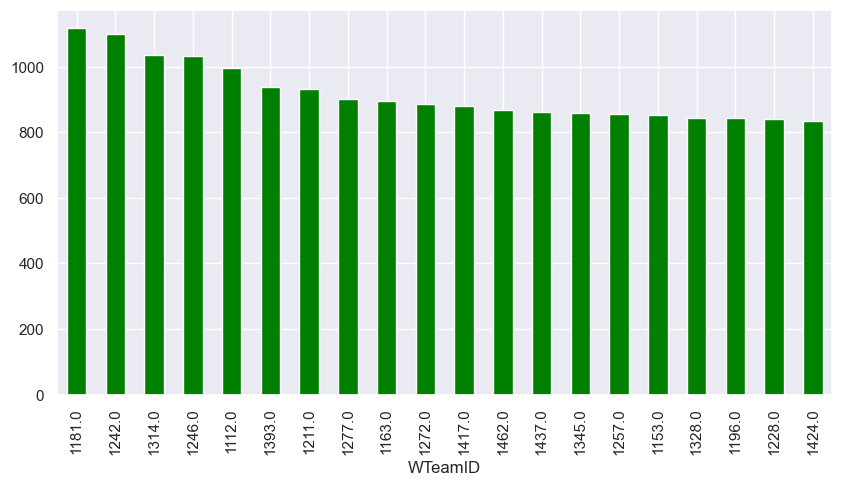

In [206]:
team = df_total['WTeamID'].value_counts().head(20)
team.plot(kind='bar', color='green', figsize=(10, 5))
# Team with the most winds 

<Axes: xlabel='WLoc', ylabel='count'>

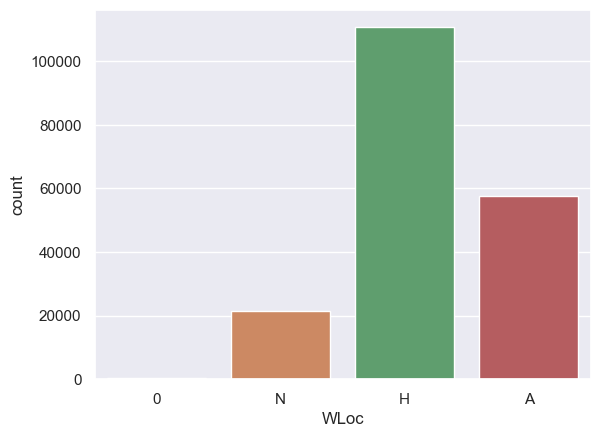

In [207]:
sns.countplot(data=df_total, x='WLoc')

# This is a look on how many games were played at home, away and neutral

<Axes: xlabel='NumOT', ylabel='count'>

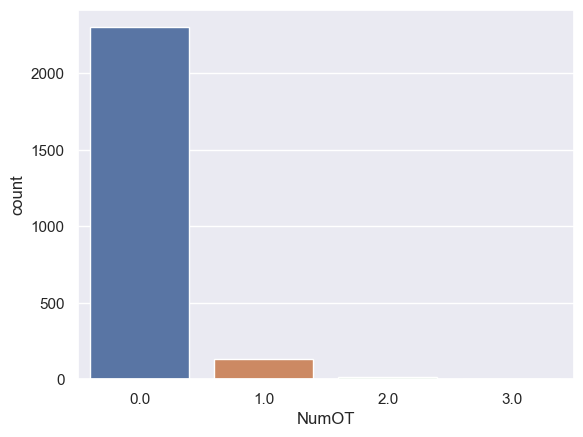

In [208]:
sns.countplot(data=df_total, x='NumOT')

<Axes: xlabel='Season', ylabel='count'>

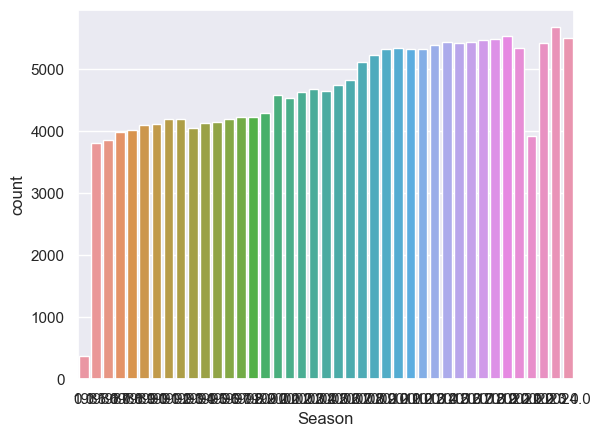

In [215]:
# We are going to look at the number of overtimes played in the games

sns.countplot(data=df_total, x='Season' )


<Axes: xlabel='WScore', ylabel='LScore'>

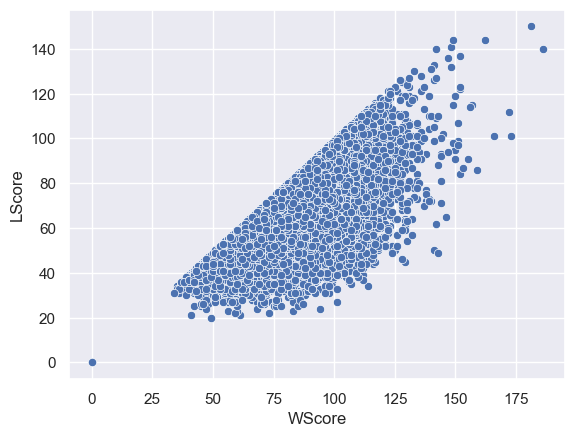

In [211]:
sns.scatterplot(data=df_total, x='WScore', y='LScore')

<Axes: xlabel='WLoc', ylabel='WScore'>

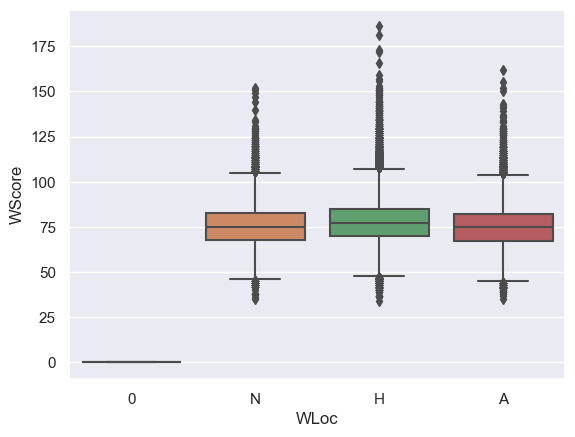

In [212]:
sns.boxplot(data=df_total, x='WLoc', y='WScore')

In [ ]:
#df_total.to_csv('../data1/df_total.csv')